# The purpose is to show the gunstryker

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[12])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['gs_169.fits',
 'gs_128.fits',
 'gs_104.fits',
 'gs_27.fits',
 'gs_153.fits',
 'gs_70.fits',
 'gs_145.fits',
 'gs_66.fits',
 'gs_89.fits',
 'gs_112.fits',
 'gs_31.fits',
 'gs_46.fits',
 'gs_165.fits',
 'gs_11.fits',
 'gs_132.fits',
 'gs_124.fits',
 'gs_50.fits',
 'gs_173.fits',
 'gs_6.fits',
 'gs_108.fits',
 'gs_93.fits',
 'gs_85.fits',
 'gs_149.fits',
 'gs_148.fits',
 'gs_84.fits',
 'gs_92.fits',
 'gs_109.fits',
 'gs_7.fits',
 'gs_172.fits',
 'gs_51.fits',
 'gs_125.fits',
 'gs_133.fits',
 'gs_10.fits',
 'gs_164.fits',
 'gs_47.fits',
 'gs_30.fits',
 'gs_113.fits',
 'gs_67.fits',
 'gs_88.fits',
 'gs_144.fits',
 'gs_71.fits',
 'gs_152.fits',
 'gs_26.fits',
 'gs_105.fits',
 'gs_129.fits',
 'gs_168.fits',
 'gs_40.fits',
 'gs_163.fits',
 'gs_17.fits',
 'gs_134.fits',
 'gs_122.fits',
 'gs_56.fits',
 'gs_175.fits',
 'gs_95.fits',
 'gs_159.fits',
 'gs_83.fits',
 'gs_118.fits',
 'gs_138.fits',
 'gs_102.fits',
 'gs_21.fits',
 'gs_155.fits',
 'gs_76.fits',
 'gs_99.fits',
 'gs_143.fits',
 'gs_60.

In [14]:
fits_files.remove('gsspectype.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [17]:
filelist[:5]

['gs_169.fits', 'gs_128.fits', 'gs_104.fits', 'gs_27.fits', 'gs_153.fits']

In [18]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^gs_([0-9].*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append('gs_'+thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [19]:
print obj_names2

['gs_169', 'gs_128', 'gs_104', 'gs_27', 'gs_153', 'gs_70', 'gs_145', 'gs_66', 'gs_89', 'gs_112', 'gs_31', 'gs_46', 'gs_165', 'gs_11', 'gs_132', 'gs_124', 'gs_50', 'gs_173', 'gs_6', 'gs_108', 'gs_93', 'gs_85', 'gs_149', 'gs_148', 'gs_84', 'gs_92', 'gs_109', 'gs_7', 'gs_172', 'gs_51', 'gs_125', 'gs_133', 'gs_10', 'gs_164', 'gs_47', 'gs_30', 'gs_113', 'gs_67', 'gs_88', 'gs_144', 'gs_71', 'gs_152', 'gs_26', 'gs_105', 'gs_129', 'gs_168', 'gs_40', 'gs_163', 'gs_17', 'gs_134', 'gs_122', 'gs_56', 'gs_175', 'gs_95', 'gs_159', 'gs_83', 'gs_118', 'gs_138', 'gs_102', 'gs_21', 'gs_155', 'gs_76', 'gs_99', 'gs_143', 'gs_60', 'gs_114', 'gs_37', 'gs_36', 'gs_115', 'gs_61', 'gs_142', 'gs_77', 'gs_98', 'gs_154', 'gs_20', 'gs_103', 'gs_139', 'gs_119', 'gs_82', 'gs_158', 'gs_94', 'gs_1', 'gs_174', 'gs_57', 'gs_123', 'gs_135', 'gs_16', 'gs_162', 'gs_41', 'gs_39', 'gs_81', 'gs_97', 'gs_78', 'gs_2', 'gs_54', 'gs_120', 'gs_136', 'gs_15', 'gs_161', 'gs_42', 'gs_35', 'gs_116', 'gs_62', 'gs_141', 'gs_74', 'gs_157

In [20]:
obj_names=obj_names2

In [21]:
print obj_files

['gs_169.fits', 'gs_128.fits', 'gs_104.fits', 'gs_27.fits', 'gs_153.fits', 'gs_70.fits', 'gs_145.fits', 'gs_66.fits', 'gs_89.fits', 'gs_112.fits', 'gs_31.fits', 'gs_46.fits', 'gs_165.fits', 'gs_11.fits', 'gs_132.fits', 'gs_124.fits', 'gs_50.fits', 'gs_173.fits', 'gs_6.fits', 'gs_108.fits', 'gs_93.fits', 'gs_85.fits', 'gs_149.fits', 'gs_148.fits', 'gs_84.fits', 'gs_92.fits', 'gs_109.fits', 'gs_7.fits', 'gs_172.fits', 'gs_51.fits', 'gs_125.fits', 'gs_133.fits', 'gs_10.fits', 'gs_164.fits', 'gs_47.fits', 'gs_30.fits', 'gs_113.fits', 'gs_67.fits', 'gs_88.fits', 'gs_144.fits', 'gs_71.fits', 'gs_152.fits', 'gs_26.fits', 'gs_105.fits', 'gs_129.fits', 'gs_168.fits', 'gs_40.fits', 'gs_163.fits', 'gs_17.fits', 'gs_134.fits', 'gs_122.fits', 'gs_56.fits', 'gs_175.fits', 'gs_95.fits', 'gs_159.fits', 'gs_83.fits', 'gs_118.fits', 'gs_138.fits', 'gs_102.fits', 'gs_21.fits', 'gs_155.fits', 'gs_76.fits', 'gs_99.fits', 'gs_143.fits', 'gs_60.fits', 'gs_114.fits', 'gs_37.fits', 'gs_36.fits', 'gs_115.fits',

In [22]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [23]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

gs_169 : 
gs_169.fits
gs_128 : 
gs_128.fits
gs_104 : 
gs_104.fits
gs_27 : 
gs_27.fits
gs_153 : 
gs_153.fits
gs_70 : 
gs_70.fits
gs_145 : 
gs_145.fits
gs_66 : 
gs_66.fits
gs_89 : 
gs_89.fits
gs_112 : 
gs_112.fits
gs_31 : 
gs_31.fits
gs_46 : 
gs_46.fits
gs_165 : 
gs_165.fits
gs_11 : 
gs_11.fits
gs_132 : 
gs_132.fits
gs_124 : 
gs_124.fits
gs_50 : 
gs_50.fits
gs_173 : 
gs_173.fits
gs_6 : 
gs_6.fits
gs_108 : 
gs_108.fits
gs_93 : 
gs_93.fits
gs_85 : 
gs_85.fits
gs_149 : 
gs_149.fits
gs_148 : 
gs_148.fits
gs_84 : 
gs_84.fits
gs_92 : 
gs_92.fits
gs_109 : 
gs_109.fits
gs_7 : 
gs_7.fits
gs_172 : 
gs_172.fits
gs_51 : 
gs_51.fits
gs_125 : 
gs_125.fits
gs_133 : 
gs_133.fits
gs_10 : 
gs_10.fits
gs_164 : 
gs_164.fits
gs_47 : 
gs_47.fits
gs_30 : 
gs_30.fits
gs_113 : 
gs_113.fits
gs_67 : 
gs_67.fits
gs_88 : 
gs_88.fits
gs_144 : 
gs_144.fits
gs_71 : 
gs_71.fits
gs_152 : 
gs_152.fits
gs_26 : 
gs_26.fits
gs_105 : 
gs_105.fits
gs_129 : 
gs_129.fits
gs_168 : 
gs_168.fits
gs_40 : 
gs_40.fits
gs_163 : 
gs_163

## Plot the SED

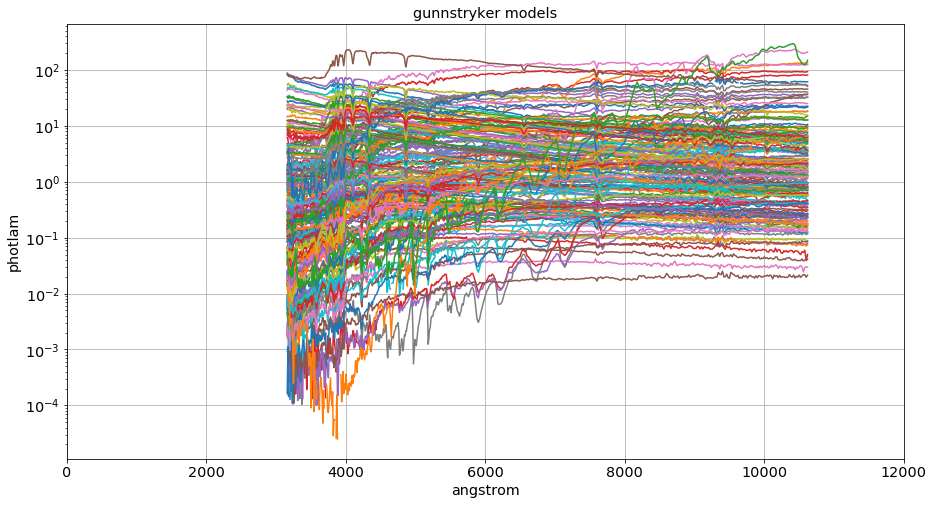

In [24]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("gunnstryker models")
    plt.savefig("gunnstryker.png")